In [1]:
import random 

import numpy as np
import matplotlib.pyplot as plt

from Petri.initialize_world import create_sorting_world
from Petri.utils import _draw, _return_neighboring_unoccupied_locs, _move, _return_neighboring_occupied_locs, _find_connected_components, _return_all_neighboring_locs
from Petri.Simulator import simulator
from Petri.elements import Dreg, Res

%matplotlib inline

In [2]:
def Black(curr_loc, env):
    """id 10.
    """
    # count enemy neighbors
    enemies = 0
    neighbors = _return_neighboring_occupied_locs(curr_loc, env)
    if neighbors:
        for neighbor in neighbors:
            if env[neighbor][0] == 5:
                enemies +=1
    
    # flip if surrounded
    if enemies >= 3:
        env[neighbor] = (5, None)
    
    # otherwise, proceed
    else:
        
        # 2a) replicate if theres a res
        neighbors = _return_neighboring_occupied_locs(curr_loc, env)
        if neighbors:
            for neighbor in neighbors:
                if env[neighbor][0] == 2:
                    env[neighbor] = (10, None)

        # 2b) then to decrease cost by bunching up
        n_neighbors = len(_return_neighboring_occupied_locs(curr_loc, env))

        # find its blob, which includes itself
        connected_components = _find_connected_components(curr_loc, env)
        for component in connected_components:

            # return possible locs surrounding the blob
            unoccupied_locs = _return_neighboring_unoccupied_locs(component, env)
            if unoccupied_locs:
                for potential_loc in unoccupied_locs:
                    potential_neighbors = _return_neighboring_occupied_locs(potential_loc, env)
                    if len(potential_neighbors) > n_neighbors:
                        element = (10, None)
                        _move(curr_loc, potential_loc, element, env)
                        return True
                    
                    
def White(curr_loc, env):
    """id 5.
    """
    # count enemy neighbors
    enemies = 0
    neighbors = _return_neighboring_occupied_locs(curr_loc, env)
    if neighbors:
        for neighbor in neighbors:
            if env[neighbor][0] == 10:
                enemies +=1
    
    # flip to black if surrounded
    if enemies >= 3:
        env[neighbor] = (10, None)
    
    # otherwise, proceed
    else:
        
        # 2a) replicate if theres a res
        neighbors = _return_neighboring_occupied_locs(curr_loc, env)
        if neighbors:
            for neighbor in neighbors:
                if env[neighbor][0] == 2:
                    env[neighbor] = (5, None)

        # 2b) then to decrease cost by bunching up
        n_neighbors = len(_return_neighboring_occupied_locs(curr_loc, env))

        # find its blob, which includes itself
        connected_components = _find_connected_components(curr_loc, env)
        for component in connected_components:

            # return possible locs surrounding the blob
            unoccupied_locs = _return_neighboring_unoccupied_locs(component, env)
            if unoccupied_locs:
                for potential_loc in unoccupied_locs:
                    potential_neighbors = _return_neighboring_occupied_locs(potential_loc, env)
                    if len(potential_neighbors) > n_neighbors:
                        element = (5, None)
                        _move(curr_loc, potential_loc, element, env)
                        return True                                  

In [3]:
from Petri.utils import _return_random_loc

def create_go(n_rows, n_cols, n_white, n_black, n_dregs):
    world = {}
    world['n_rows'] = n_rows
    world['n_cols'] = n_cols
            
    for _ in range(n_white):
        loc = _return_random_loc(n_rows, n_cols)
        world[loc] = (5, None)
        
    for _ in range(n_black):
        loc = _return_random_loc(n_rows, n_cols)
        world[loc] = (10, None)
        
    for _ in range(n_dregs):
        loc = _return_random_loc(n_rows, n_cols)
        world[loc] = (1, None)
        
    return world

In [4]:
loop = {5: White, 10: Black, 1: Dreg, 2: Res}

n_rows = 30
n_cols = 30
epochs = 500000
ENV = create_go(n_rows=n_rows, n_cols=n_cols, n_white=50, n_black=50, n_dregs=1)
CANVASS = np.zeros((n_rows, n_cols))

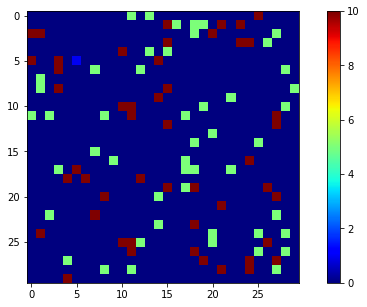

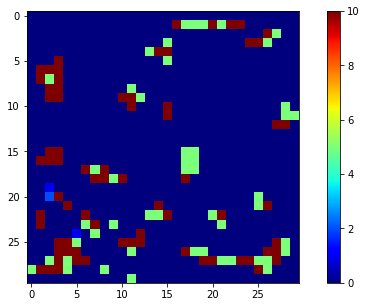

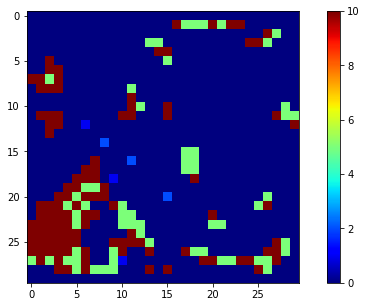

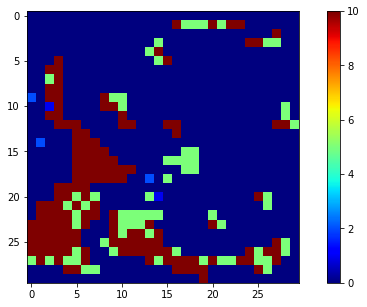

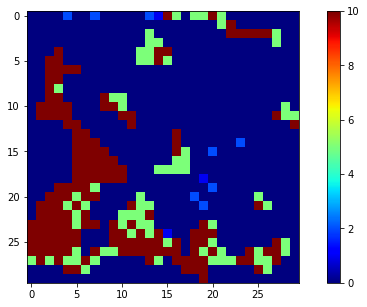

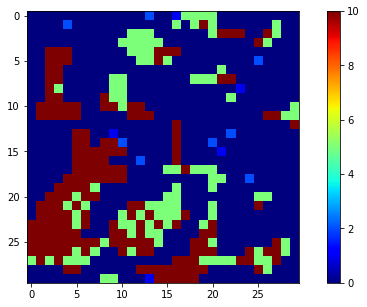

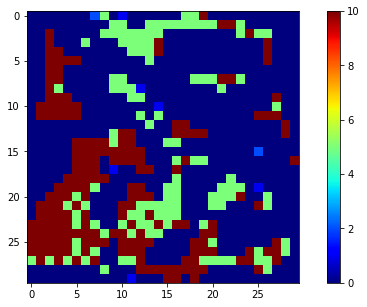

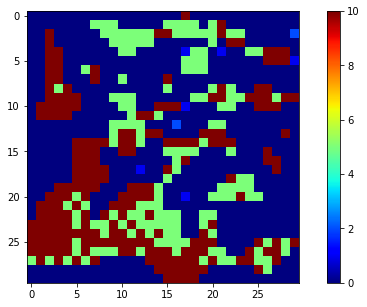

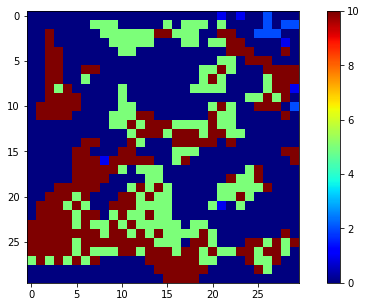

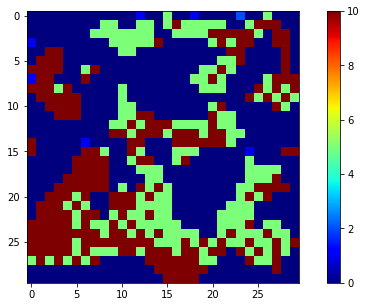

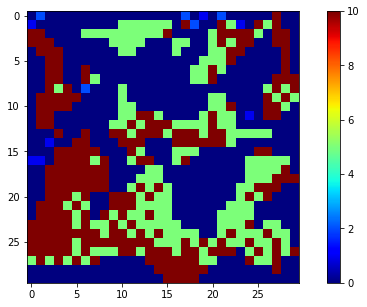

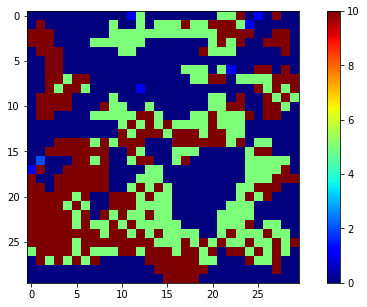

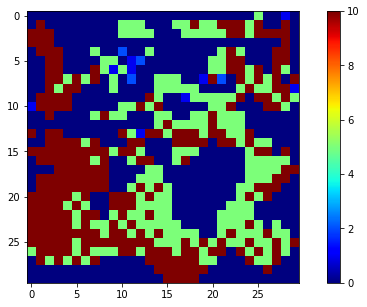

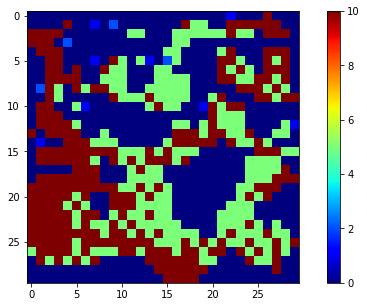

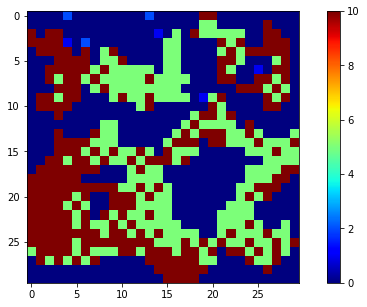

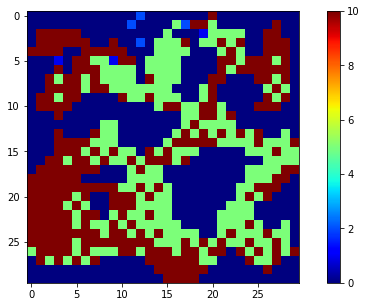

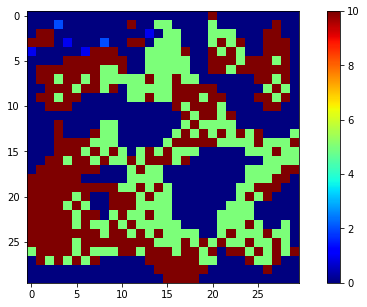

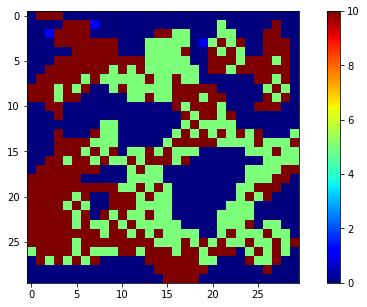

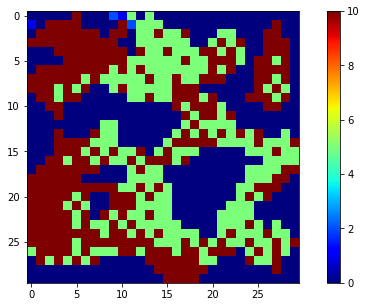

In [5]:
simulator(ENV, CANVASS, epochs, loop, frames=20, save=False)